### MOUGNUTOU YONE Guy Christian semaine32

In [189]:
# Importation des bibliothèques de manipulation des données
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
from sklearn.metrics import accuracy_score
import time

In [80]:
#Importation de la base des données
data = pd.read_csv('https://raw.githubusercontent.com/pefura/IFPERA/main/Cameroon_lung_function.csv', sep = ';')

### Exploration des données

In [81]:
data.head()

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
0,1000948,1,4.95,1,109,1.230,1.12,1.39,0.91
1,500921,1,5.00,1,119,1.100,1.10,1.81,1.00
2,1000157,1,5.40,1,107,0.970,0.91,1.70,0.94
3,1000805,1,5.29,1,118,0.939,0.94,1.64,1.00
4,1000174,1,5.53,1,119,1.390,1.34,2.03,0.96


In [82]:
# dimension de la base 
data.shape

(1777, 9)

#### Il y a 09 variables et 1777 individus dans notre base

In [83]:
data.dtypes

ID             int64
sex            int64
age          float64
ethnicity      int64
height         int64
fvc          float64
fev          float64
fef2575      float64
fevfvc       float64
dtype: object

In [84]:
data.ethnicity.value_counts()

1    1477
2     217
3      83
Name: ethnicity, dtype: int64

#### Il y a 1477 Bantu ; 217 Soudano-sahelian et 83 d'individus qui ne sont ni bantu ni Soudano-sahelian.

In [85]:
data.sex.value_counts()

2    935
1    842
Name: sex, dtype: int64

#### Nous avons 935 femmes et 842 hommes dans la table.

In [86]:
#Verifions les valeurs manquantes
cnt = data.isna().sum()
print(cnt)

ID           0
sex          0
age          0
ethnicity    0
height       0
fvc          0
fev          0
fef2575      0
fevfvc       0
dtype: int64


#### La table des données ne contient aucune variable manquante

### 1.	Sélectionner la sous-base que vous nommerez dataset ne contenant que les variables d’intérêt.

#### Variables d'intérêt: sex, age, ethnicity, height, fvc, fev.

In [87]:
dataset = data.filter(["sex", "age", "height", "fev"])

In [88]:
dataset.head(3)

,sex,age,height,fev
0,1,4.95,109,1.12
1,1,5.00,119,1.10
2,1,5.40,107,0.91


In [89]:
dataset.shape

(1777, 4)

### 2.	Tracer un nuage de points comparant le fev en fonction de l’âge chez les sujets de sexe masculin et les sujets de sexe féminin. 

<AxesSubplot:title={'center':'fev en fonction de l’âge chez les femmes'}, xlabel='age', ylabel='fev'>

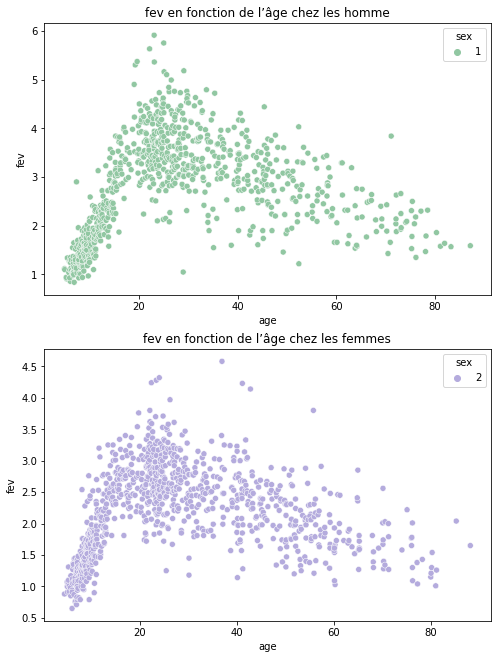

In [90]:
plt.figure(figsize=(8,11))
plt.subplot(2,1,1)
plt.title("fev en fonction de l’âge chez les homme")
sns.scatterplot(data= dataset.loc[dataset['sex'] == 1], x="age", y="fev", hue=("sex"), palette="ch:4,r=.5,l=.7")

plt.subplot(2,1,2)
plt.title("fev en fonction de l’âge chez les femmes")
sns.scatterplot(data= dataset.loc[dataset['sex'] == 2], x="age", y="fev", hue=("sex"), palette="ch:5,r=.5,l=.7")

### 3.	Tracer un nuage de points comparant le fev en fonction de la taille chez les sujets de sexe masculin et les sujets de sexe féminin. 

### b- Chez les sujets de sexe Féminin

<AxesSubplot:title={'center':'fev en fonction de la taille chez les femmes'}, xlabel='height', ylabel='fev'>

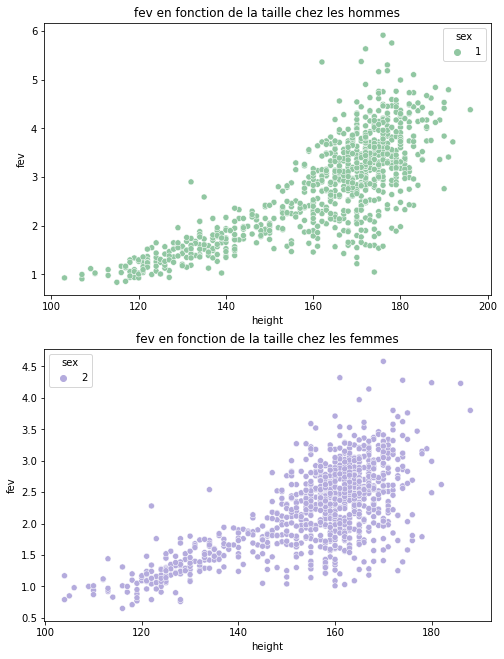

In [91]:
plt.figure(figsize=(8,11))
plt.subplot(2,1,1)
plt.title("fev en fonction de la taille chez les hommes")
sns.scatterplot(data= dataset.loc[dataset['sex'] == 1], x="height", y="fev", hue=("sex"), palette="ch:4,r=.5,l=.7")

plt.subplot(2,1,2)
plt.title("fev en fonction de la taille chez les femmes")
sns.scatterplot(data= dataset.loc[dataset['sex'] == 2], x="height", y="fev", hue=("sex"), palette="ch:5,r=.5,l=.7")

### 4.	Produire un graphique 3D montrant la relation entre fev et age/taille séparément chez les sujets de sexe féminin et les sujets de sexe masculin.

#### fev en fonction de l'âge chez les hommes 3D

C:\Users\GSI\AppData\Local\Temp\ipykernel_8804\4048707569.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


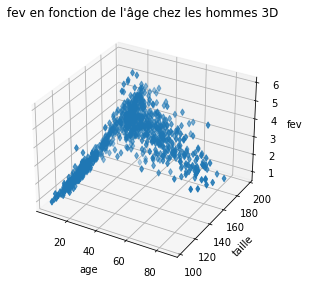

In [92]:
x = dataset.loc[dataset['sex'] == 1].age  
y = dataset.loc[dataset['sex'] == 1].height
z = dataset.loc[dataset['sex'] == 1].fev 

# Tracé du résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.scatter(x, y, z, label='Courbe', marker='d')  # Tracé des points 3D
plt.title("fev en fonction de l'âge chez les hommes 3D")
ax.set_xlabel('age')
ax.set_ylabel('taille')
ax.set_zlabel('fev')
plt.tight_layout()

#### fev en fonction de l'âge chez les femmes 3D

C:\Users\GSI\AppData\Local\Temp\ipykernel_8804\2689824941.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')  # Affichage en 3D


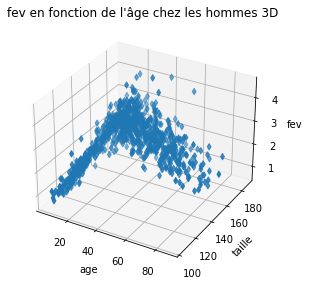

In [93]:
x = dataset.loc[dataset['sex'] == 2].age  
y = dataset.loc[dataset['sex'] == 2].height
z = dataset.loc[dataset['sex'] == 2].fev 

# Tracé du résultat en 3D
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.scatter(x, y, z, label='Courbe', marker='d')  # Tracé des points 3D
plt.title("fev en fonction de l'âge chez les hommes 3D")
ax.set_xlabel('age')
ax.set_ylabel('taille')
ax.set_zlabel('fev')
plt.tight_layout()
plt.show()

### 5.	Sélectionner la sous-base dataset_male ne contenant que les données des sujets de sexe masculin et dataset_female ne contenant que les données des sujets de sexe féminin.

#### a- base des données des sujets de sexe Masculin

In [94]:
data_male = dataset.loc[dataset['sex'] == 1]

In [95]:
data_male.shape

(842, 4)

In [96]:
data_male.head(3)

,sex,age,height,fev
0,1,4.95,109,1.12
1,1,5.00,119,1.10
2,1,5.40,107,0.91


#### a- base des données des sujets de sexe Féminin

In [97]:
data_female = dataset.loc[dataset['sex'] == 2]

In [98]:
data_female.shape

(935, 4)

In [99]:
data_female.head(3)

,sex,age,height,fev
842,2,4.45,119,0.88
843,2,5.02,109,1.00
844,2,5.00,123,1.07


#####  save dataset

In [245]:
data_male.to_csv('C:/Users/GSI/Desktop/mougnutou/semaine27_28/data_m_32.csv', index=False)
data_female.to_csv('C:/Users/GSI/Desktop/mougnutou/semaine27_28/data_f_32.csv', index=False)

### Sélection des prédicteurs

In [105]:
from sklearn.model_selection import train_test_split  

y_m = data_male['fev']
X_m = data_male.drop(columns =['fev'])
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m,test_size=0.2, random_state=1)

In [106]:
y_f = data_female['fev']
X_f = data_female.drop(columns =['fev'])
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f,test_size=0.2, random_state=1)

In [107]:
print("X_m_train SHAPE:", X_m_train.shape), print("y_m_train SHAPE:", y_m_train.shape),
print("X__mtest SHAPE:", X_m_test.shape), print("y_m_test SHAPE:", y_m_test.shape); 

print("X_f_train SHAPE:", X_f_train.shape), print("y_f_train SHAPE:", y_f_train.shape),
print("X_f_test SHAPE:", X_f_test.shape), print("y_f_test SHAPE:", y_f_test.shape); 

X_m_train SHAPE: (673, 3)
y_m_train SHAPE: (673,)
X__mtest SHAPE: (169, 3)
y_m_test SHAPE: (169,)
X_f_train SHAPE: (748, 3)
y_f_train SHAPE: (748,)
X_f_test SHAPE: (187, 3)
y_f_test SHAPE: (187,)


In [108]:
X_m_test.head(3), X_f_test.head(3)

(     sex        age  height
 483    1  27.132101     160
 187    1  12.500000     144
 658    1  41.021218     177,
       sex        age  height
 1205    2  21.221081     162
 883     2   7.080000     128
 1692    2  56.229979     169)

#### 	Définir un pipeline permettant de pré-traiter les colonnes des variables explicatives.

<AxesSubplot:xlabel='height'>

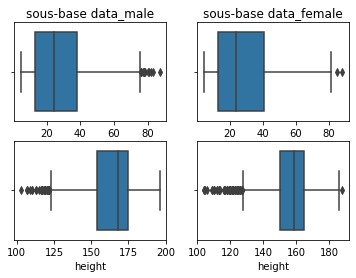

In [109]:
plt.subplot(2,2,1)
sns.boxplot(x=data_male["age"])
plt.title("sous-base data_male")

plt.subplot(2,2,3)
sns.boxplot(x=data_male["height"]) 

plt.subplot(2,2,2)
sns.boxplot(x=data_female["age"])
plt.title("sous-base data_female")

plt.subplot(2,2,4)
sns.boxplot(x=data_female["height"])

##### présence des outliers dans les variables explicatives, nous allons appliquer la normalisation par la médiane

In [110]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import RobustScaler
pipeline_m = RobustScaler()
pipeline_f = RobustScaler()

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

features = ['age', 'height']

preprocessor_m = make_column_transformer((pipeline_m, features))
preprocessor_f = make_column_transformer((pipeline_f, features))

In [112]:
data_preproprocess_m = preprocessor_m.fit_transform(X)
data_preproprocess_f = preprocessor_f.fit_transform(X)

In [113]:
data_preproprocess.shape

(842, 2)

In [114]:
data_preproprocess

array([[-0.79523193, -2.80952381],
       [-0.79321779, -2.33333333],
       [-0.77710474, -2.9047619 ],
       ...,
       [ 2.30650496, -0.42857143],
       [ 2.35867112, -0.14285714],
       [ 2.51638274,  0.23809524]])

In [119]:
# transformation des variables d'entrainement et de test dans le pipeline
X_m_train_scaled = preprocessor_m.fit_transform(X_m_train)
X_m_test_scaled = preprocessor_m.transform(X_m_test)

print("X_m_train:\n", pd.DataFrame(X_m_train_scaled).head(3))
print("X_m_test:\n", pd.DataFrame(X_m_test_scaled).head(3))

X_m_train:
           0         1
0  0.015383  0.476190
1  0.259010  0.476190
2 -0.599822 -1.714286
X_m_test:
           0         1
0  0.101986 -0.380952
1 -0.507009 -1.142857
2  0.680057  0.428571


In [120]:
# transformation des variables d'entrainement et de test dans le pipeline
X_f_train_scaled = preprocessor_f.fit_transform(X_f_train)
X_f_test_scaled = preprocessor_f.transform(X_f_test)

print("X_f_train:\n", pd.DataFrame(X_f_train_scaled).head(3))
print("X_f_test:\n", pd.DataFrame(X_f_test_scaled).head(3))

X_f_train:
           0         1
0 -0.163327  0.466667
1  0.621003 -0.266667
2 -0.489453 -1.400000
X_f_test:
           0         1
0 -0.101728  0.200000
1 -0.619903 -2.066667
2  1.181110  0.666667


### 6.	Quels sont les hyperparamètres optimaux pour chacun des modèles ?

In [139]:
# Packages for models training
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoLarsIC

### Dans la sous-base data_male

#### Recherche des paramètres les plus pertrinents pour les différents modèls dans la sous-base des sujets de sexe masculin.

In [123]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [128]:
# Plus Proches Voisins
KNN_model_m = make_pipeline(preprocessor_m, KNeighborsRegressor())
distributions = dict(n_neighbors=np.arange(1,10))
clf_KNN_model_m = RandomizedSearchCV(KNN_model_m.steps[1][1], distributions, random_state=1)
search = clf_KNN_model_m.fit(X_train, y_train)
search.best_params_

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 8}

##### Nompbre de voisins 8

In [129]:
# Random Forest 
RF_model_m = make_pipeline(preprocessor_m, RandomForestRegressor(random_state=1))
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_RF_model_m = RandomizedSearchCV(RF_model_m.steps[1][1], distributions, random_state=1)
search = clf_RF_model_m.fit(X_train, y_train)
search.best_params_

{'n_estimators': 255, 'max_depth': 6}

##### Nombre d'estimateurs 255; profondeur de la forêt 6

In [130]:
# Gradient Boosting
GBC_model_m = make_pipeline(preprocessor_m, GradientBoostingRegressor(random_state=1))
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_GBC_model_m = RandomizedSearchCV(GBC_model_m.steps[1][1], distributions, random_state=1)
search = clf_GBC_model_m.fit(X_train, y_train)
search.best_params_

{'n_estimators': 204, 'max_depth': 1}

##### Nombre d'estimateurs 204; profondeur de la forêt 1

#### Recherche des paramètres les plus pertrinents pour les différents modèls dans la sous-base des sujets de sexe feminin.

In [131]:
# Plus Proches Voisins
KNN_model_f = make_pipeline(preprocessor_f, KNeighborsRegressor())
distributions = dict(n_neighbors=np.arange(1,10))
clf_KNN_model_f = RandomizedSearchCV(KNN_model_f.steps[1][1], distributions, random_state=1)
search = clf_KNN_model_f.fit(X_train, y_train)
search.best_params_

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 8}

#### Nompbre de voisins 8

In [132]:
# Random Forest 
RF_model_f = make_pipeline(preprocessor_f, RandomForestRegressor(random_state=1))
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_RF_model_f = RandomizedSearchCV(RF_model_f.steps[1][1], distributions, random_state=1)
search = clf_RF_model_f.fit(X_train, y_train)
search.best_params_

{'n_estimators': 255, 'max_depth': 6}

#### Nombre d'estimateurs 255; profondeur de la forêt 6

In [135]:
# Gradient Boosting
GBC_model_f = make_pipeline(preprocessor_f, GradientBoostingRegressor(random_state=1))
distributions = dict(max_depth=np.arange(1,10),
                     n_estimators=np.arange(60,600))
clf_GBC_model_f = RandomizedSearchCV(GBC_model_f.steps[1][1], distributions, random_state=1)
search = clf_GBC_model_f.fit(X_train, y_train)
search.best_params_

{'n_estimators': 204, 'max_depth': 1}

#### Nombre d'estimateurs 204; profondeur de la forêt 1

### 7.	Entrainer les différents modèles et produire un tableau des métriques (incluant l’AIC et le BIC) évaluant et comparant les différents modèles. 

### Entrainement du modèle de KNeighborsClassifier chez les hommes

In [161]:
KN_model_m = make_pipeline(preprocessor_m, KNeighborsRegressor(n_neighbors = 4))
KN_model_m.fit(X_m_train, y_m_train)
KN_model_m.score(X_m_train, y_m_train), KN_model_m.score(X_m_test, y_m_test)

(0.8220696568531475, 0.6100500341206117)

In [169]:
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X_m, y_m)

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [151]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")
alpha_aic = lasso_lars_ic[-1].alpha_

In [152]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X_m, y_m)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

C:\Users\GSI\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [153]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
0.027049,3361.241430,3361.241430
0.005626,1699.242733,1703.978513
0.000000,1370.788230,1380.259790


### Entrainement du modèle RandomForestRegressor chez les hommes

In [160]:
RF_model_m = make_pipeline(preprocessor_m, RandomForestRegressor(n_estimators = 255, max_depth = 6, random_state=1))
RF_model_m.fit(X_m_train, y_m_train)
RF_model_m.score(X_m_train, y_m_train), RF_model_m.score(X_m_test, y_m_test)

(0.8303123167375518, 0.6605697047343738)

### Entrainement du modèle gradient boosting chez les hommes

In [165]:
GB_model_m = make_pipeline(preprocessor_m, GradientBoostingRegressor(n_estimators = 204, max_depth = 1, random_state=1))
GB_model_m.fit(X_m_train, y_m_train)
GB_model_m.score(X_m_train, y_m_train), GB_model_m.score(X_m_test, y_m_test)

(0.7887625408469606, 0.6933216117852725)

### Entrainement du modèle de KNeighborsClassifier chez les femmes

In [170]:
KN_model_f = make_pipeline(preprocessor_f, KNeighborsRegressor(n_neighbors = 4))
KN_model_f.fit(X_f_train, y_f_train)
KN_model_f.score(X_f_train, y_f_train), KN_model_f.score(X_f_test, y_f_test)

(0.7611598567320813, 0.6389955952990636)

### Entrainement du modèle RandomForestRegressor chez les femmes

In [172]:
RF_model_f = make_pipeline(preprocessor_f, RandomForestRegressor(n_estimators = 255, max_depth = 6, random_state=1))
RF_model_f.fit(X_f_train, y_f_train)
RF_model_f.score(X_f_train, y_f_train), RF_model_f.score(X_f_test, y_f_test)

(0.7472261421699973, 0.6681830040907153)

### Entrainement du modèle gradient boosting chez les femmes

In [173]:
GB_model_f = make_pipeline(preprocessor_f, GradientBoostingRegressor(n_estimators = 204, max_depth = 1, random_state=1))
GB_model_f.fit(X_f_train, y_f_train)
GB_model_f.score(X_f_train, y_f_train), GB_model_f.score(X_f_test, y_f_test)

(0.7059539969671799, 0.6679543319000391)

In [180]:
print("Médiane de la fev:", median(data_female.fev))
print("Limite supérieure de la fev:", max(data_female.fev))
print("Limite infériere de la fev:", min(data_female.fev))

médiane de la fev: 2.28
limite supérieure de la fev: 4.58
limite infériere de la fev: 0.65


### 8.	Rédiger et tester une fonction de prédiction des valeurs médianes ainsi que les limites inférieure et supérieure de fev. 

In [212]:
def evaluation(model):
    model_m = model.steps[1][1]
    model_m.fit(X_m_train, y_m_train)
    y_m_pred = model_m.predict(X_m_test)
    mediane = median(y_m_pred)
    limax = max(y_m_pred)
    limin = min(y_m_pred)
    results.style.apply(highlight_min)
    return mediane, limax, limin 

In [217]:
print('K Nearest Neighbors chez les hommes:')
print("Médiane de la fev:", median(data_male.fev))
print("Limite supérieure de la fev:", max(data_male.fev))
print("Limite infériere de la fev:", min(data_male.fev))

K Nearest Neighbors chez les hommes:
Médiane de la fev: 2.93
Limite supérieure de la fev: 5.91
Limite infériere de la fev: 0.84


In [218]:
def evaluation(model):
    model_f = model.steps[1][1]
    model_f.fit(X_f_train, y_f_train)
    y_f_pred = model_f.predict(X_f_test)
    mediane = median(y_f_pred)
    limax = max(y_f_pred)
    limin = min(y_f_pred)
    results.style.apply(highlight_min)
    return mediane, limax, limin 

In [219]:
print('K Nearest Neighbors chez les hommes:')
print("Médiane de la fev:", median(data_female.fev))
print("Limite supérieure de la fev:", max(data_female.fev))
print("Limite infériere de la fev:", min(data_female.fev))

K Nearest Neighbors chez les hommes:
Médiane de la fev: 2.28
Limite supérieure de la fev: 4.58
Limite infériere de la fev: 0.65
